In [77]:
%pylab nbagg
from matplotlib.pyplot import*
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')
from scipy.integrate import odeint
from scipy.interpolate import interp1d


Populating the interactive namespace from numpy and matplotlib


In [78]:
#parameters for the given numerical problem
m=70. #mass of the body in units of kg
y0=32000 #initial height of body in m
v0=0 #initial velocity of body in m/s
g=9.81 #gravitational acceleration in m/s^2
c2=0.5 #the drag coeffiction for body in kg/m
R_e=6370000 #Earth's radius in m
H=8000 #scale height of atmosphere in m

In [79]:
#Part a
#Time to impact with constant g and no drag

In [80]:
#Setting up system of ODEs
#y1=height of parachutist
#y2=person's velocity
#a=-g, b=-c2/m
def dydt(y,t,a,b):
    y1,y2=y
    dy_dt=[y2,a+b*y2*abs(y2)]
    return dy_dt

In [81]:
a=-g
b=0 #Not taking drag into consideration
end_time=90 #Rough estimatation
t=linspace(0,end_time,1000) #Integrating from t=0 to t=1000
solution=odeint(dydt,[y0,v0],t,args=(a,b)) #solve ODEs to obtain velocity and height

In [82]:
f=interp1d(solution[1:-1,0],t[1:-1])
print('The time of impact, neglecting air resistance and with a constant gravitational acceleration is %.0f seconds'%(f(0.)))

The time of impact, neglecting air resistance and with a constant gravitational acceleration is 81 seconds


In [83]:
#Part b
#Time of impact, neglecting air resistance and with a constant gravitational acceleration is given by F(x)=-c_2v|v|

In [84]:
a=-g
b=-c2/m
end_time=900
t=linspace(0,end_time,1500)
solution_b=odeint(dydt,[y0,v0],t,args=(a,b)) #Solving ODEs with these parameters

In [85]:
f_b=interp1d(solution_b[1:-1,0], t[1:-1])
print('Time for impact, neglecting air resistance with constant gravitational acceleration is %0.f seconds.'%(f_b(0.)))

Time for impact, neglecting air resistance with constant gravitational acceleration is 866 seconds.


In [86]:
#Part c
#Time for impact as drag coefficient, c2, varies as c_2=0.5e^{-\\fracy{y}{H}} , and as g varies as g=\\frac{9.8}{(1+\\frac{y}{R_e})^2} m/s^2

In [87]:
#We should reintroduce dydt function to take into consideration the changes made for altitude constants
def dydt(y,t):
    y1,y2=y
    #a=-g/(1+y1/R_e)**2
    #b=-0.5*exp(-y1/H)/m
    dy_dt=[y2,(-g/(1+y1/R_e)**2)+(-0.5*exp(-y1/H)/m)*y2*abs(y2)]
    return dy_dt

In [88]:
end_time=400
t=linspace(0, end_time, 1000)
solution_c=odeint(dydt, [y0,v0], t)

In [89]:
f_c=interp1d(solution_c[1:-1,0], t[1:-1])
print('Time for impact with varying drag constant, c2, and gravitational acceleration is %0.f seconds.'%(f_c(0.)))

Time for impact with varying drag constant, c2, and gravitational acceleration is 381 seconds.


In [90]:
#Part d
#Plotting acceleration, velocity, and altitude with varying gravitational and drag force
#But first, we must find acceleration before plotting

In [91]:
y=solution_c[:,0]
v=solution_c[:,1]
dv_dt=(-g/(1+y/R_e)**2)+(-0.5*exp(-y/H)/m)*v*abs(v)

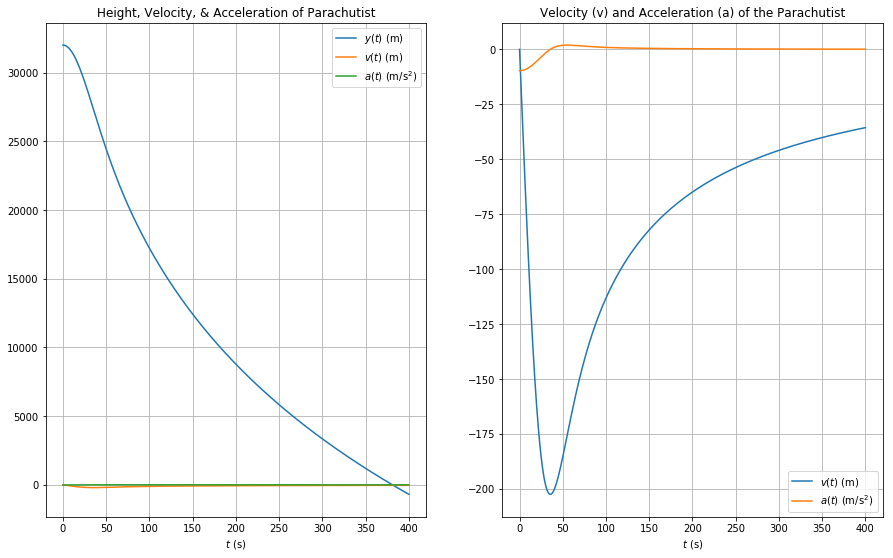

In [93]:
#Creating the plot of acceleration, velocity, and altitude
fig=figure(2,figsize=(15,20))
ax1=fig.add_subplot(221)
ax1.plot(t, solution_c[:,0], label= '$y(t)\\ (\\mathrm{m})$')
ax1.plot(t, solution_c[:,1], label= '$v(t)\\ (\\mathrm{m})$')
ax1.plot(t, dv_dt, label='$a(t)\\ (\\mathrm{m/s^2})$')
ax1.legend(loc='best')
xlabel('$t\\ (\\mathrm{s})$')
title('Height, Velocity, & Acceleration of Parachutist')
ax1.grid()

#Obtain a "zoom-in" perspective of velocity and acceleration by adding subplot
ax2=fig.add_subplot(222)
ax2.plot(t, solution_c[:,1], label= '$v(t)\\ (\\mathrm{m})$')
ax2.plot(t, dv_dt, label='$a(t)\\ (\\mathrm{m/s^2})$')
ax2.legend(loc='best')
xlabel('$t\\ (\\mathrm{s})$')
title('Velocity (v) and Acceleration (a) of the Parachutist')
ax2.grid()
show()

In [ ]:
#Part d
#Explain why the acceleration becomes positive as the parachutist falls.
Gravity is the main force that accelerated his fall. With time, he keeps falling so that the velocity (v) and the drag force (Fd) would increase (including air resistance). When he reaches his terminal (max) velocity, the drag and gravitational forces must be the same (equal), while his acceleration becomes zero. As the parachutist approaches his terminal velocty (Vt) in an asymptote-like behavior, the velocity of the parachutist slows down. Therefore, his acceleration approaches zero in an asymptote-like behavior, but remains positive throughout the fall.